In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import json
import logging
from marshaltools import ProgramList
from astropy.time import Time
import astropy.units as u
import os

from Observatory import Observatory
from utils import get_config, plot_visibility, prepare_snifs_schedule

In [2]:
# If you are running this notebook for the first time, you will be prompted to enter your username and
# the path to your downloads from slack. If you entered something incorrectly, you can correct this in .config
config = get_config()

username = config['username']
date = '2018-10-08'
obs = 'uh88'
tshift = {'ntt': -0.25, 'uh88': 0}  # In units of days
trange = [Time(Time(date).jd+tshift[obs],format='jd'), Time(Time(date).jd+1.+tshift[obs],format='jd')]

logpath = 'logs/'

# log
logger = logging.getLogger(username)
handler = logging.FileHandler(os.path.join(logpath, 'ztfcosmo_visibilty_%s_%s_%s.log'%(obs,date,username)))
handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)

In [3]:
observatories ={
    'uh88': Observatory('uh88', 19.8231, -155.47, 4205, sun_alt_th=-17, logger=logger),
    'ntt': Observatory('ntt', -29.25, -70.73, 2375, sun_alt_th=-12, logger=logger), # What's the twilight limit for ePESSTO?
}

INFO:ufeindt:Initialized Observatory uh88 at position (lon 19.82 deg, lat -155.47 deg, alt: 4205.0 m)
INFO:ufeindt:Initialized Observatory ntt at position (lon -29.25 deg, lat -70.73 deg, alt: 2375.0 m)


In [13]:
pl = ProgramList('AMPEL Test')

targets = json.load(open('sne_following.json'))

INFO:marshaltools.ProgramList:Initialized ProgramList for program AMPEL Test (ID 10)
INFO:marshaltools.ProgramList:Loaded 220 saved sources for program AMPEL Test.


In [5]:
# Calculate dark time and observation windows

dark_time = observatories[obs].get_dark_times(trange)

obs_windows = {}
for snname in targets.keys():
    ra = pl.sources[snname]['ra']
    dec = pl.sources[snname]['dec']
    logger.info('Calculating visibility of source %s (ra: %f, dec: %f) with %s.'%(snname, ra, dec, obs))
    obs_w = observatories[obs].compute_visibility(ra, dec, trange)
    if len(obs_w['visible']) > 0:
        obs_windows[snname] = obs_w
    else:
        logger.info('Source %s (ra: %f, dec: %f) not observable with %s.'%(snname, ra, dec, obs))

INFO:ufeindt:computed dark times (sun_alt: -17.00) between 2018-10-08 00:00:00.000 and 2018-10-08 23:55:00.000. Total of 9.92 hours of dark
INFO:ufeindt:Calculating visibility of source ZTF18abcqvhs (ra: 301.674905, dec: 37.783455) with uh88.
INFO:ufeindt:computing visibility of source at (ra: 301.674905, dec: 37.783455) from observatory uh88
INFO:ufeindt:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -17.00 deg
					-Moon distance: 30.00 deg
INFO:ufeindt:computed dark times (sun_alt: -17.00) between 2018-10-08 00:00:00.000 and 2018-10-08 23:55:00.000. Total of 9.92 hours of dark
INFO:ufeindt:source is visible for a total of 4.750 hours. Took 6.09e-01 sec
INFO:ufeindt:Calculating visibility of source ZTF18abnujuy (ra: 330.124841, dec: 43.553731) with uh88.
INFO:ufeindt:computing visibility of source at (ra: 330.124841, dec: 43.553731) from observatory uh88
INFO:ufeindt:using visibility constraints:
					-Time resolution: 5.00

INFO:ufeindt:computed dark times (sun_alt: -17.00) between 2018-10-08 00:00:00.000 and 2018-10-08 23:55:00.000. Total of 9.92 hours of dark
INFO:ufeindt:source is visible for a total of 7.917 hours. Took 6.31e-01 sec
INFO:ufeindt:Calculating visibility of source ZTF18aburkuo (ra: 322.388385, dec: 24.898952) with uh88.
INFO:ufeindt:computing visibility of source at (ra: 322.388385, dec: 24.898952) from observatory uh88
INFO:ufeindt:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -17.00 deg
					-Moon distance: 30.00 deg
INFO:ufeindt:computed dark times (sun_alt: -17.00) between 2018-10-08 00:00:00.000 and 2018-10-08 23:55:00.000. Total of 9.92 hours of dark
INFO:ufeindt:source is visible for a total of 6.000 hours. Took 6.22e-01 sec
INFO:ufeindt:Calculating visibility of source ZTF18abuksxd (ra: 308.058962, dec: 23.377840) with uh88.
INFO:ufeindt:computing visibility of source at (ra: 308.058962, dec: 23.377840) from observator

INFO:ufeindt:source is visible for a total of 2.750 hours. Took 6.40e-01 sec
INFO:ufeindt:Calculating visibility of source ZTF18abxdkny (ra: 284.045885, dec: 78.865301) with uh88.
INFO:ufeindt:computing visibility of source at (ra: 284.045885, dec: 78.865301) from observatory uh88
INFO:ufeindt:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -17.00 deg
					-Moon distance: 30.00 deg
INFO:ufeindt:computed dark times (sun_alt: -17.00) between 2018-10-08 00:00:00.000 and 2018-10-08 23:55:00.000. Total of 9.92 hours of dark
INFO:ufeindt:source is visible for a total of 1.750 hours. Took 6.24e-01 sec
INFO:ufeindt:Calculating visibility of source ZTF18abwlpzf (ra: 273.898651, dec: 34.761001) with uh88.
INFO:ufeindt:computing visibility of source at (ra: 273.898651, dec: 34.761001) from observatory uh88
INFO:ufeindt:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -17.00 deg
	

INFO:ufeindt:source is visible for a total of 3.167 hours. Took 6.25e-01 sec
INFO:ufeindt:Calculating visibility of source ZTF18abvrzqj (ra: 17.330200, dec: -15.594812) with uh88.
INFO:ufeindt:computing visibility of source at (ra: 17.330200, dec: -15.594812) from observatory uh88
INFO:ufeindt:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -17.00 deg
					-Moon distance: 30.00 deg
INFO:ufeindt:computed dark times (sun_alt: -17.00) between 2018-10-08 00:00:00.000 and 2018-10-08 23:55:00.000. Total of 9.92 hours of dark
INFO:ufeindt:source is visible for a total of 6.917 hours. Took 6.10e-01 sec
INFO:ufeindt:Calculating visibility of source ZTF18abwbtco (ra: 50.870613, dec: 25.570822) with uh88.
INFO:ufeindt:computing visibility of source at (ra: 50.870613, dec: 25.570822) from observatory uh88
INFO:ufeindt:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -17.00 deg
			

In [14]:
additional_names = ['ZTF18abwbaim', 'ZTF18abvrzqj', 'ZTF18abxdkni', 'ZTF18abwktmm', 'ZTF18abxbugc',
                    'ZTF18abxdtyz', 'ZTF18abwxhjo', 'ZTF18abvptts', 'ZTF18abxygvv', 'ZTF18abxxssh',
                    'ZTF18abxyudf', 'ZTF18abyxwrf', 'ZTF18abykswp', 'ZTF18abwwfyo']
for snname in additional_names:
    ra = pl.sources[snname]['ra']
    dec = pl.sources[snname]['dec']
    logger.info('Calculating visibility of source %s (ra: %f, dec: %f) with %s.'%(snname, ra, dec, obs))
    obs_w = observatories[obs].compute_visibility(ra, dec, trange)
    if len(obs_w['visible']) > 0:
        obs_windows[snname] = obs_w
    else:
        logger.info('Source %s (ra: %f, dec: %f) not observable with %s.'%(snname, ra, dec, obs))

INFO:ufeindt:Calculating visibility of source ZTF18abwbaim (ra: 53.358339, dec: -18.835591) with uh88.
INFO:ufeindt:computing visibility of source at (ra: 53.358339, dec: -18.835591) from observatory uh88
INFO:ufeindt:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -17.00 deg
					-Moon distance: 30.00 deg
INFO:ufeindt:computed dark times (sun_alt: -17.00) between 2018-10-08 00:00:00.000 and 2018-10-08 23:55:00.000. Total of 9.92 hours of dark
INFO:ufeindt:source is visible for a total of 5.667 hours. Took 6.57e-01 sec
INFO:ufeindt:Calculating visibility of source ZTF18abvrzqj (ra: 17.330200, dec: -15.594812) with uh88.
INFO:ufeindt:computing visibility of source at (ra: 17.330200, dec: -15.594812) from observatory uh88
INFO:ufeindt:using visibility constraints:
					-Time resolution: 5.00 min
					-Airmass limit: 2.00
					-Sun altitude: -17.00 deg
					-Moon distance: 30.00 deg
INFO:ufeindt:computed dark times (sun_alt: -17.

INFO:ufeindt:source is visible for a total of 5.333 hours. Took 6.48e-01 sec


In [15]:
print('%i of %i targets are observable with %s.'%(len(obs_windows.keys()), len(targets)+len(additional_names), obs))

59 of 67 targets are observable with uh88.


In [16]:
# Manual list of SNe to be exluded because they are already in the queue for SEDM
exclude = []
# Current SEDM/Marshal list
foo = '''ZTF18abcqvhs, ZTF18abscygs, ZTF18ablllyw, ZTF18abthaii, ZTF18abtswjk, ZTF18abwfmot, ZTF18absoomk, ZTF18abvnwzz, ZTF18abtxvhy, ZTF18abvfecb, ZTF18abwktmm, ZTF18abxyudf, ZTF18abxwiqz, ZTF18abxbhov, ZTF18abvtrnc, ZTF18abvxqtp'''
exclude.extend( foo.split(', ') )
# SNIFS observed
foo = '''ZTF18abvxqtp
ZTF18abuksxd
ZTF18abwlpzf
ZTF18aburkuo
ZTF18absgvqb
ZTF18abuicad
ZTF18abuioue
ZTF18abtghbi
ZTF18abwkxgo
ZTF18abvrgjc
ZTF18abwbtco'''
exclude.extend( foo.split('\n') )
print(exclude)

['ZTF18abcqvhs', 'ZTF18abscygs', 'ZTF18ablllyw', 'ZTF18abthaii', 'ZTF18abtswjk', 'ZTF18abwfmot', 'ZTF18absoomk', 'ZTF18abvnwzz', 'ZTF18abtxvhy', 'ZTF18abvfecb', 'ZTF18abwktmm', 'ZTF18abxyudf', 'ZTF18abxwiqz', 'ZTF18abxbhov', 'ZTF18abvtrnc', 'ZTF18abvxqtp', 'ZTF18abvxqtp', 'ZTF18abuksxd', 'ZTF18abwlpzf', 'ZTF18aburkuo', 'ZTF18absgvqb', 'ZTF18abuicad', 'ZTF18abuioue', 'ZTF18abtghbi', 'ZTF18abwkxgo', 'ZTF18abvrgjc', 'ZTF18abwbtco']


In [17]:

# Sort the SNe by time of lowest airmass etc
snnames = [k for k in obs_windows.keys() if k not in exclude]

# Sort by end of visibility
f_sort = lambda a: np.where(dark_time == obs_windows[a]['visible'][-1])[0][0]
snnames = sorted(snnames, key=f_sort)
# Sort by start of visibility
f_sort = lambda a: np.where(dark_time == obs_windows[a]['visible'][0])[0][0]
snnames = sorted(snnames, key=f_sort)
# Sort by time of best airmass
f_sort = lambda a: np.where(dark_time == obs_windows[a]['visible'][obs_windows[a]['airmass'] == min(obs_windows[a]['airmass'])])[0][0]
snnames = sorted(snnames, key=f_sort)
# Sort by priority (For now number of "Very Good" by last three scanners, should be refined)
f_sort = lambda a: (3 - len([b for b in targets[a][-3:] if b[0] == 'VeryGood']) 
                    if a in targets.keys() and a not in additional_names else 4)
snnames = sorted(snnames, key=f_sort)
priorities = [f_sort(a) for a in snnames]

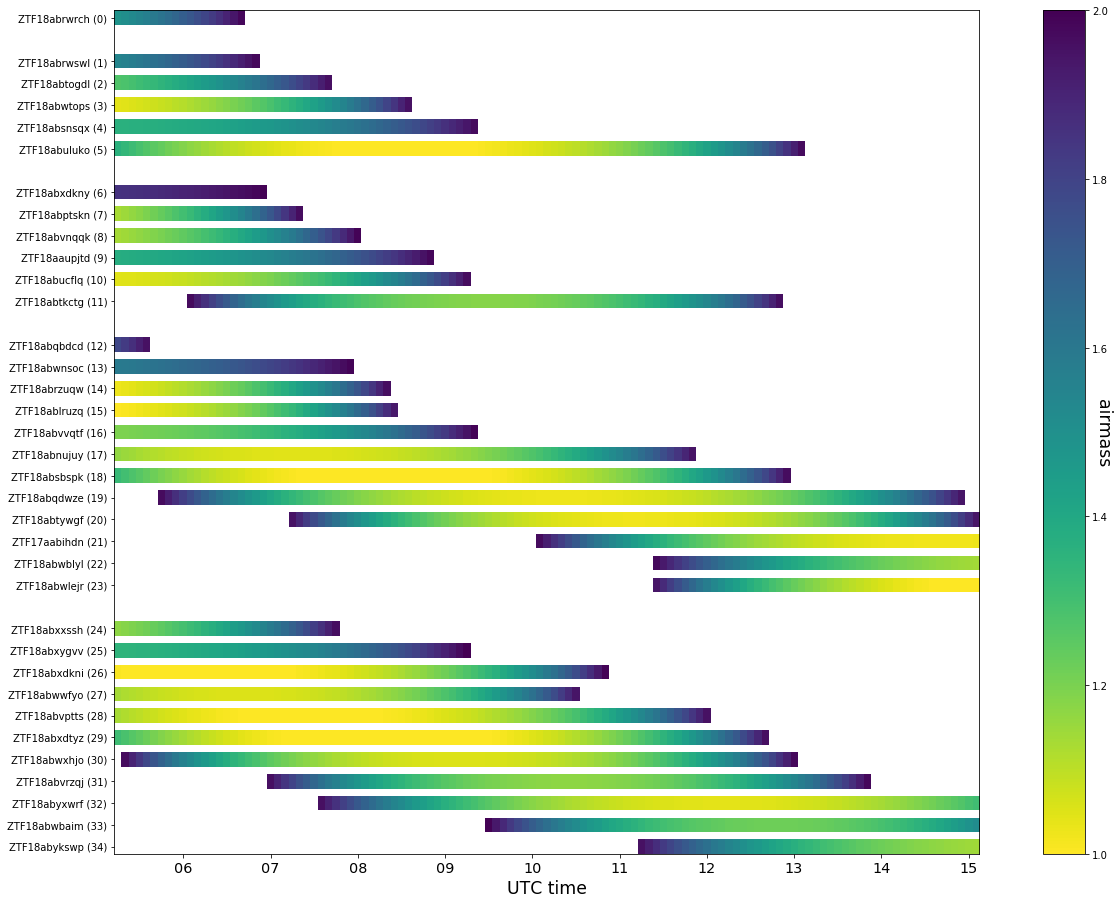

In [18]:
_ = plot_visibility(snnames, obs_windows, dark_time, priorities)

11 SNe selected


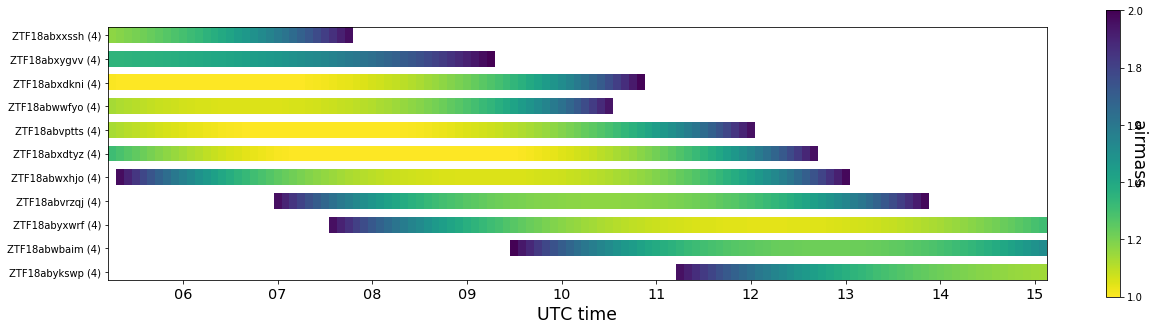

In [19]:
selected = [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
# Set manual priorities if you wish
prio_new = []
print('%i SNe selected'%len(selected))

snnames_selected = [snnames[k] for k in selected]
priorities_selected = [priorities[k] for k in selected]

sort_again = True
if sort_again:
    # sort them by time of lowest airmass again
    f_sort = lambda a: np.where(dark_time == obs_windows[a]['visible'][obs_windows[a]['airmass'] == min(obs_windows[a]['airmass'])])[0][0]
    if len(prio_new) < len(selected):
        tmp = sorted(zip(snnames_selected, priorities_selected) , key=lambda a: f_sort(a[0]))
    else:
        tmp = sorted(zip(snnames_selected, prio_new) , key=lambda a: f_sort(a[0]))
    snnames_selected = [a[0] for a in tmp]
    priorities_selected = [a[1] for a in tmp]

_ = plot_visibility(snnames_selected, obs_windows, dark_time, priorities_selected, labeltype='priority')
plt.savefig('snifs/targets_snifs_%s.png'%date)

In [20]:
# SANITY CHECK!
# For the beginning it might be good to double check the selected targets on the marshal.
for k in selected:
    print('Please double check whether target %i (%s, priority %i) is a good target:'%(k, snnames[k], priorities[k]))
    print('http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=%s'%snnames[k])

Please double check whether target 24 (ZTF18abxxssh, priority 4) is a good target:
http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=ZTF18abxxssh
Please double check whether target 25 (ZTF18abxygvv, priority 4) is a good target:
http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=ZTF18abxygvv
Please double check whether target 26 (ZTF18abxdkni, priority 4) is a good target:
http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=ZTF18abxdkni
Please double check whether target 27 (ZTF18abwwfyo, priority 4) is a good target:
http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=ZTF18abwwfyo
Please double check whether target 28 (ZTF18abvptts, priority 4) is a good target:
http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=ZTF18abvptts
Please double check whether target 29 (ZTF18abxdtyz, priority 4) is a good target:
http://skipper.caltech.edu:8080/cgi-bin/growth/view_source.cgi?name=ZTF18abxdtyz
Please double ch

In [22]:
if obs == 'uh88':
    if len(prio_new) == len(selected):
        snnames_out = [snnames[k] for k, p in sorted(zip(selected, prio_new), key=lambda a: a[1])]
    else:
        snnames_out = [snnames[k] for k in selected]
    prepare_snifs_schedule(snnames_out, pl.sources, obs_windows, date, logger=logger)

In [34]:
allocation = json.load(open('sne_allocation.json'))

In [31]:
for k in selected:
    if snnames[k] not in allocation:
        allocation[snnames[k]] = {}
    allocation[snnames[k]][obs] = [date, 'in_progress']

In [33]:
json.dump(allocation, open('sne_allocation.json', 'w'))